In [0]:
#simplified interface for building models 
import keras
#our handwritten character labeled dataset
from keras.datasets import mnist
#because our models are simple
from keras.models import Sequential
#dense means fully connected layers, dropout is a technique to improve convergence, flatten to reshape our matrices for feeding
#into respective layers
from keras.layers import Dense, Dropout, Flatten
#for convolution (images) and pooling is a technique to help choose the most relevant features in an image
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import math
import numpy as np

In [0]:
#mini batch gradient descent ftw
batch_size = 128
#10 difference characters
num_classes = 10
#very short training time
epochs = 12
#input shape of each image


# input image dimensions
#28x28 pixel images. 
img_rows, img_cols = 28, 28
img_shape = (28, 28)

In [0]:
# the data downloaded, shuffled and split between train and test sets
#if only all datasets were this easy to import and format
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3,channels) while
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
#more reshaping
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#x_train=x_train.reshape((-1,28,28,1))
#x_test=x_test.reshape((-1,28,28,1))
#y_train=x_train.reshape((-1,28,28,1))
#y_test=x_test.reshape((-1,28,28,1))

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
#build our model
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_classes, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
#train that ish!
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
 #how well did it do? 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.2602 - acc: 0.9200 - val_loss: 0.0615 - val_acc: 0.9803
Epoch 2/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0885 - acc: 0.9735 - val_loss: 0.0402 - val_acc: 0.9866
Epoch 3/10
25984/60000 [===========>..................] - ETA: 5s - loss: 0.0651 - acc: 0.9798

60000/60000 [==============================] - 11s 180us/step - loss: 0.0641 - acc: 0.9806 - val_loss: 0.0376 - val_acc: 0.9871
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0544 - acc: 0.9834 - val_loss: 0.0308 - val_acc: 0.9899
Epoch 5/10
53504/60000 [=========================>....] - ETA: 1s - loss: 0.0464 - acc: 0.9859

60000/60000 [==============================] - 11s 182us/step - loss: 0.0473 - acc: 0.9857 - val_loss: 0.0327 - val_acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0425 - acc: 0.9871 - val_loss: 0.0271 - val_acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0382 - acc: 0.9886 - val_loss: 0.0280 - val_acc: 0.9911
Epoch 8/10
  512/60000 [..............................] - ETA: 10s - loss: 0.0255 - acc: 0.9902

60000/60000 [==============================] - 11s 181us/step - loss: 0.0360 - acc: 0.9889 - val_loss: 0.0261 - val_acc: 0.9915
Epoch 9/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0311 - acc: 0.9905 - val_loss: 0.0294 - val_acc: 0.9906
Epoch 10/10
48256/60000 [=======================>......] - ETA: 2s - loss: 0.0289 - acc: 0.9909

60000/60000 [==============================] - 11s 181us/step - loss: 0.0290 - acc: 0.9910 - val_loss: 0.0265 - val_acc: 0.9909
Test loss: 0.026513816644794498
Test accuracy: 0.9909


In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.7, wspace=0.7)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        #ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = weights#session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
weights1 = model.layers[0].get_weights()[0]

weights2 = model.layers[1].get_weights()[0]

weights6 = model.layers[5].get_weights()[0]

weights8 = model.layers[7].get_weights()[0]

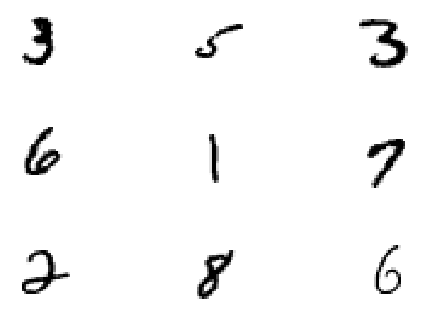

In [0]:
images = x_train[10:19]
cls_true = x_test[10:19]
plot_images(images=images,cls_true=cls_true,cls_pred=None)

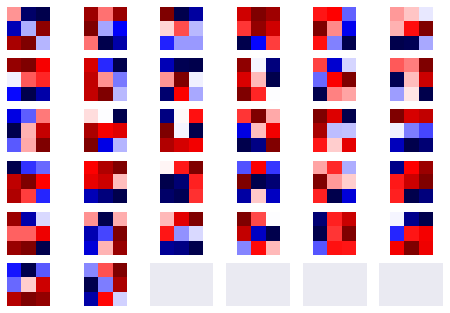

conv_layer1 None


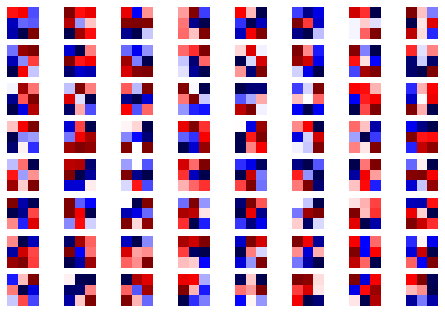

conv_layer2 None


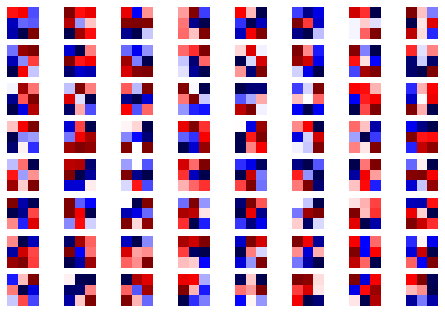

dense_layer1 None


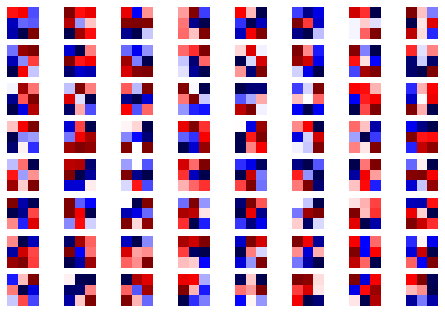

dense_layer2 None


In [0]:
print("conv_layer1", plot_conv_weights(weights1))
print("conv_layer2", plot_conv_weights(weights2))
print("dense_layer1", plot_conv_weights(weights2))
print("dense_layer2", plot_conv_weights(weights2))

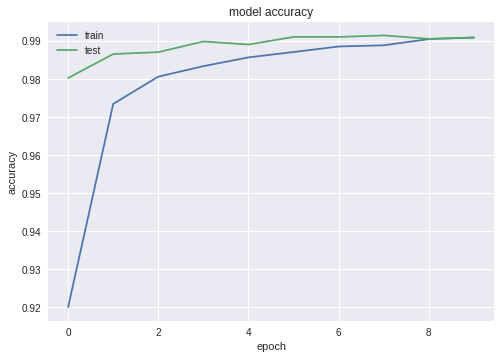

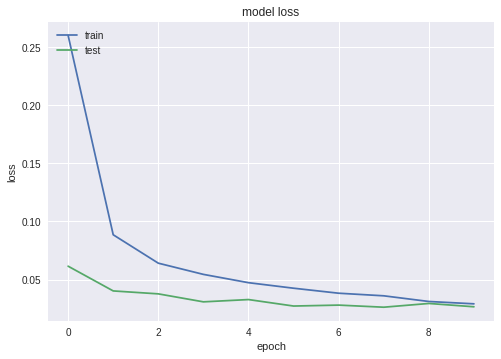

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()